<a href="https://colab.research.google.com/github/saumyadash9/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Saumya_Dash_Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato-Restaurant-Clustering-And-Sentiment-Analysis



##### **Project Type**    - Unsupervised 
##### **Contribution**    - Team
##### **Team Member 1 -** Saumya Dash
##### **Team Member 2 -**Kumar Abhinav Thakur

# **Project Summary -**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.
# Attribute Information
**Zomato Restaurant Data** 

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

**Zomato Restaurant reviews**

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [132]:
# Load Dataset
df1 = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

### Dataset First View

In [133]:
# Dataset First Look
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [134]:
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [135]:
# Dataset Rows & Columns count
df1.shape

(105, 6)

In [136]:
df2.shape

(10000, 7)

### Dataset Information

In [137]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [138]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [139]:
# Dataset Duplicate Value Count
# check duplicates
df1[df1.duplicated()]

,Name,Links,Cost,Collections,Cuisines,Timings


In [140]:
# Dataset Duplicate Value Count
df2.duplicated().sum()

36

In [141]:
# Veiwing the duplictaed instances
df2[df2.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [142]:
df2.drop_duplicates(inplace = True)

#### Missing Values/Null Values

In [143]:
# Missing Values/Null Values Count
#Checking Null Values
null_df1= pd.DataFrame({"Total Values": df1.shape[0] , "Total Null values": df1.isnull().sum(),"%a of Null values" : round((df1.isnull().sum()/ df1.shape[0])*100 , 2) })
null_df1.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
Collections,105,54,51.43
Timings,105,1,0.95
Name,105,0,0.00
Links,105,0,0.00
Cost,105,0,0.00
Cuisines,105,0,0.00


Text(0.5, 1.0, 'Missing Values in Dataset')

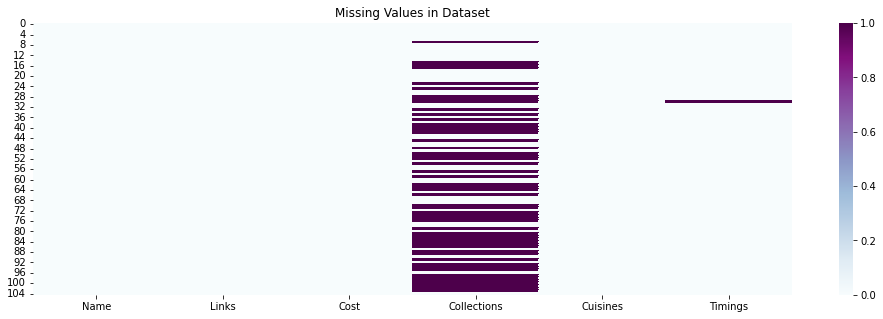

In [144]:
#vizualizing the null values of each column
plt.figure(figsize=(17, 5))
sns.heatmap(df1.isnull(),cbar=True,cmap = 'BuPu')
plt.title('Missing Values in Dataset')

In [145]:
# Missing Values/Null Values Count
#Checking Null Values
null_df2= pd.DataFrame({"Total Values": df2.shape[0] , "Total Null values": df2.isnull().sum(),"%a of Null values" : round((df2.isnull().sum()/ df2.shape[0])*100 , 2) })
null_df2.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
Review,9964,9,0.09
Reviewer,9964,2,0.02
Rating,9964,2,0.02
Metadata,9964,2,0.02
Time,9964,2,0.02
Restaurant,9964,0,0.00
Pictures,9964,0,0.00


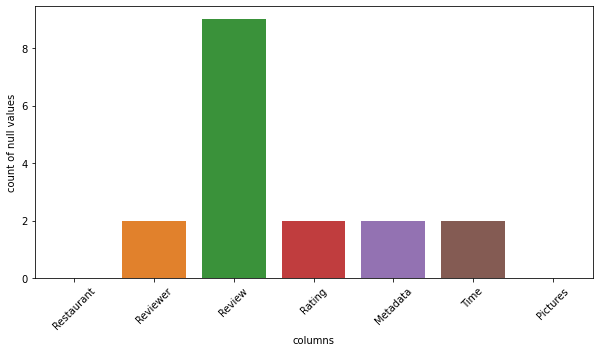

In [146]:
#vizualizing the columns with their total number of null values
null_df2 = df2.isnull().sum().reset_index()
null_df2.rename(columns = {'index':'columns', 0:'count of null values'}, inplace = True)
plt.figure(figsize=(10, 5))
sns.barplot(x = 'columns',
             y = 'count of null values',
            data = null_df2)
sns.color_palette("mako", as_cmap=True)
plt.xticks(rotation= 45)
plt.show()

### What did you know about your dataset?

 **What did you know about your dataset?**
* We have 2 datasets zomato restaurant names and metadata(df1) and zomato restaurant reviews data(df2).
* There are 105 rows in df1 and 6 columns in the df1 namely 'Name', 'Links', 'Cost', 'Collections', 'Cuisines'and 'Timings'.
* There are 10000 rows in df1 and 7 columns in the df2 namely 'Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time' and 'Pictures'
* Majority of the columns are textual.
* There are 36 duplicated instances in df2 and no duplicated instances in df1.
* We noticed that there were 2 columns Collections(54) and Timmings(1) in df1 whereas 4 columns Reviewer(9), Review(2), Rating(2), Metadata(2) and Time(2) in df2.

## ***2. Understanding Your Variables***

In [147]:
# Dataset Columns
df1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [148]:
df2.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [149]:
# Dataset Describe
df1.describe(include='all').round(2)

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [150]:
# Dataset Describe
df2.describe(include='all').round(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,9964,9962,9955,9962,9962,9962,9964.00
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.75
std,NaN,NaN,NaN,NaN,NaN,NaN,2.57
min,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.00


### Variables Description 

### Check Unique Values for each variable.

In [151]:
# Check Unique Values for each variable.
df2['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [152]:
# list_df1 = ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

In [153]:
# list_df2 = ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
#        'Pictures']

In [154]:
# Check Unique Values for each variable.
print("Unique values in these categorical features: \n")
for i in list(df1.columns):
  print(f'Unique values in {i}>>>>>>>>>>>>>>>>>>>>>>>  {df1[i].unique()}')
  print('--------------------------------------------------------------------------------------')

Unique values in these categorical features: 

Unique values in Name>>>>>>>>>>>>>>>>>>>>>>>  ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitch

In [155]:
# Checking Unique Values for each variable in df2 i.e Zomato Restaurant Review Dataset
print("Unique values in these categorical features: \n")
for i in list(df2.columns):
  print(f'Unique values in {i}>>>>>>>>>>>>>>>>>>>>>>>  {df2[i].unique()}')
  print('--------------------------------------------------------------------------------------')

Unique values in these categorical features: 

Unique values in Restaurant>>>>>>>>>>>>>>>>>>>>>>>  ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster

## 3. ***Data Wrangling***

### Data Wrangling Code

In [156]:
# Write your code to make your dataset analysis ready.

In [157]:
#drop collections
df1.drop('Collections', axis=1, inplace=True)

In [158]:
#Impute one missing timing row with the mode
df1['Timings'].fillna(df1['Timings'].mode()[0],inplace=True)

In [159]:
# changing cost datatype
df1['Cost'] = df1['Cost'].str.replace(',','')
df1['Cost'] = df1['Cost'].astype('int')

In [160]:
#dropping null rows in reviews first
df2.dropna(subset = ["Review"], inplace=True)

In [161]:
#like should not be here
# correcting and changing the datatype
df2['Rating'] = df2['Rating'].replace('Like','4')
df2['Rating'] = df2['Rating'].astype('float')

In [162]:
df2['Time'] = pd.to_datetime(df2['Time'])

In [163]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    int64 
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [164]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9955 non-null   object        
 1   Reviewer    9955 non-null   object        
 2   Review      9955 non-null   object        
 3   Rating      9955 non-null   float64       
 4   Metadata    9955 non-null   object        
 5   Time        9955 non-null   datetime64[ns]
 6   Pictures    9955 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 622.2+ KB


In [165]:
# link value
df1.loc[0,'Links']

'https://www.zomato.com/hyderabad/beyond-flavours-gachibowli'

In [166]:
#function to extract location of the restaurant
def location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
df1['Location'] = df1['Links'].apply(location)

In [167]:
# looks like the dataset consists of the restaurants in Hyderabad
df1.Location.value_counts()

hyderabad             104
thetiltbarrepublic      1
Name: Location, dtype: int64

saara gachilowli hai. 1 the til republic h


In [168]:
#drop link
df1.drop('Links', axis=1, inplace=True)

In [169]:
#We will consider the count of cuisines list as in Cuisines there are values seperated by comma
list_of_cuisins = df1.Cuisines.str.split(', ')

df1['Cuisines_list'] = pd.Series()

for i in range(len(df1)):
  df1['Cuisines_list'][i] = list_of_cuisins[i]

<ipython-input-169-fc2d21683fdb>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1['Cuisines_list'] = pd.Series()
<ipython-input-169-fc2d21683fdb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cuisines_list'][i] = list_of_cuisins[i]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [170]:
df1['Total Cuisines'] = df1['Cuisines_list'].apply(lambda x : len(x))
df1.drop(['Cuisines'],axis=1,inplace=True)

In [171]:
df1.head(5)

,Name,Cost,Timings,Location,Cuisines_list,Total Cuisines
0,Beyond Flavours,800,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",hyderabad,"[Chinese, Continental, Kebab, European, South ...",6
1,Paradise,800,11 AM to 11 PM,hyderabad,"[Biryani, North Indian, Chinese]",3
2,Flechazo,1300,"11:30 AM to 4:30 PM, 6:30 PM to 11 PM",hyderabad,"[Asian, Mediterranean, North Indian, Desserts]",4
3,Shah Ghouse Hotel & Restaurant,800,12 Noon to 2 AM,hyderabad,"[Biryani, North Indian, Chinese, Seafood, Beve...",5
4,Over The Moon Brew Company,1200,"12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",hyderabad,"[Asian, Continental, North Indian, Chinese, Me...",5


In [172]:
df2['No. of Reviews'],df2['Followers']=df2['Metadata'].str.split(',').str
df2['No. of Reviews'] = pd.to_numeric(df2['No. of Reviews'].str.split(' ').str[0])
df2['Followers'] = pd.to_numeric(df2['Followers'].str.split(' ').str[1])
df2 = df2.drop(['Metadata'], axis = 1)
df2.dtypes

<ipython-input-172-94a62f380546>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df2['No. of Reviews'],df2['Followers']=df2['Metadata'].str.split(',').str


Restaurant                object
Reviewer                  object
Review                    object
Rating                   float64
Time              datetime64[ns]
Pictures                   int64
No. of Reviews             int64
Followers                float64
dtype: object

In [173]:
df2.head(2)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No. of Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0


### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Univariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Estimated Cost of dining')

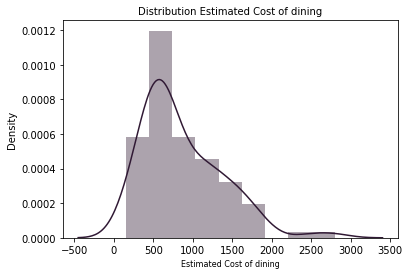

In [174]:
#distribution of Cost of Dining 
sns.distplot(x=df1['Cost'], color = '#301934')
plt.xlabel('Estimated Cost of dining',size=8)
plt.title('Distribution Estimated Cost of dining',size=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 Univariate Analysis

Text(0.5, 1.0, 'Count of Restuarants as per the Ratings')

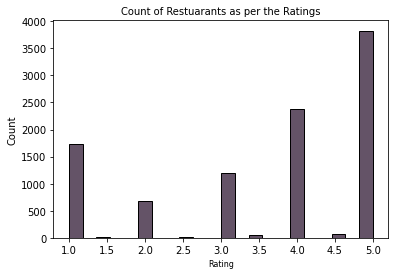

In [175]:
sns.histplot(x= df2['Rating'], color = '#301934')
plt.xlabel('Rating',size=8)
plt.title('Count of Restuarants as per the Ratings',size=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [176]:
df_merged= df1.merge(df2, how='inner', left_on='Name', right_on='Restaurant')
df_merged.head(1)

,Name,Cost,Timings,Location,Cuisines_list,Total Cuisines,Restaurant,Reviewer,Review,Rating,Time,Pictures,No. of Reviews,Followers
0,Beyond Flavours,800,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",hyderabad,"[Chinese, Continental, Kebab, European, South ...",6,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


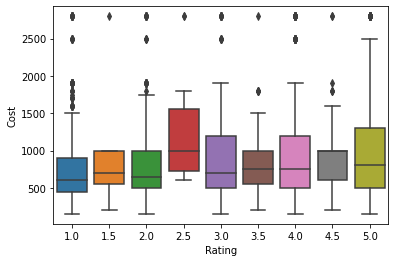

In [177]:
sns.boxplot(df_merged.Rating, df_merged.Cost)
plt.show()

In [178]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9954
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            9955 non-null   object        
 1   Cost            9955 non-null   int64         
 2   Timings         9955 non-null   object        
 3   Location        9955 non-null   object        
 4   Cuisines_list   9955 non-null   object        
 5   Total Cuisines  9955 non-null   int64         
 6   Restaurant      9955 non-null   object        
 7   Reviewer        9955 non-null   object        
 8   Review          9955 non-null   object        
 9   Rating          9955 non-null   float64       
 10  Time            9955 non-null   datetime64[ns]
 11  Pictures        9955 non-null   int64         
 12  No. of Reviews  9955 non-null   int64         
 13  Followers       8381 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
me

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Bivariate Analysis

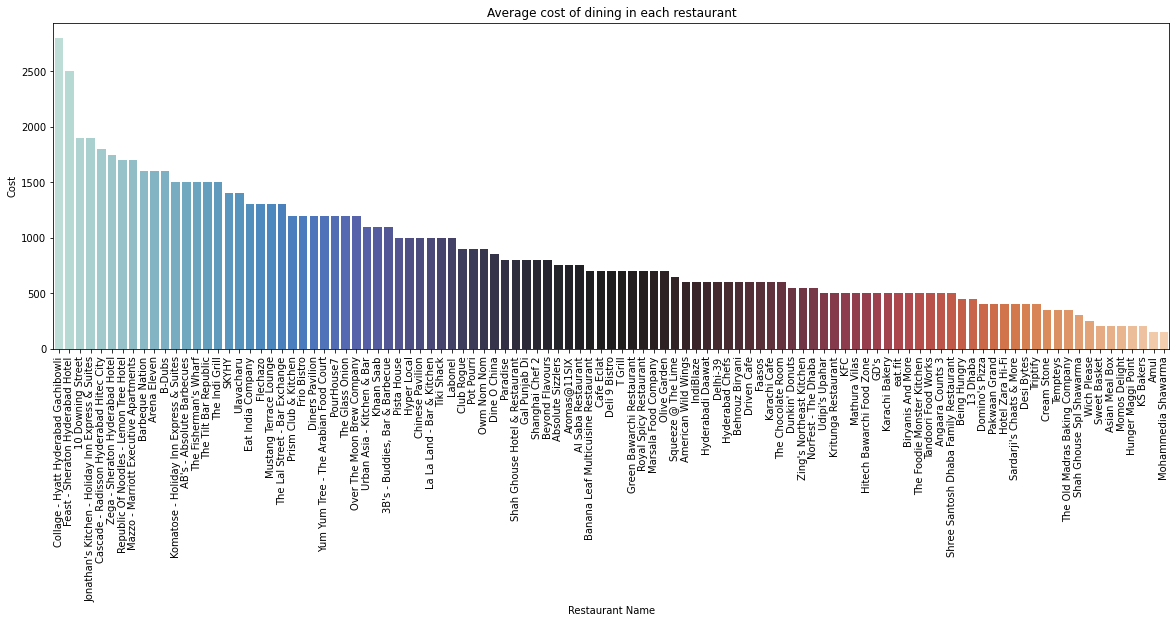

In [179]:
# average cost of each restaurant
avg_cost_vs_rest= df1.groupby(['Name'])['Cost'].mean().sort_values(ascending=False).reset_index()
avg_cost_vs_rest.sort_values(by = 'Cost',ascending = False,inplace = True)

fig = plt.figure(figsize=[20,6])
sns.barplot(data=avg_cost_vs_rest, x='Name', y= 'Cost', palette ="icefire")
plt.title("Average cost of dining in each restaurant")
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Text(0, 0.5, 'count of cuisines in all restaurants')

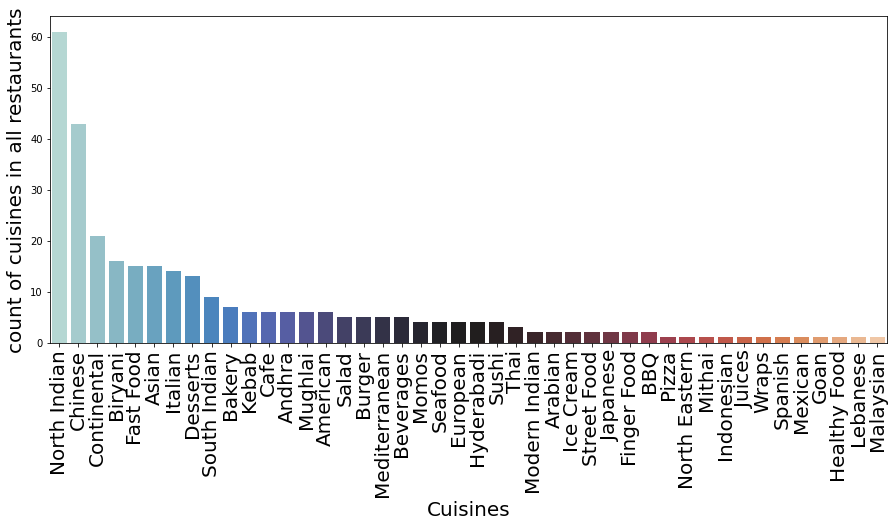

In [180]:
# Chart - 5 visualization code
diff_cuisines = {} 
for names in list(df1['Cuisines_list']): 
    for name in names:
        if (name in diff_cuisines):
            diff_cuisines[name]+=1
        else:  
            diff_cuisines[name]=1 
cuisines_df = pd.DataFrame(diff_cuisines.values(), diff_cuisines.keys(),columns = {'cuisines_counts'}).reset_index()
cuisines_df.sort_values(by = 'cuisines_counts',ascending = False,inplace = True) 
cuisines_df.rename(columns={'index':'cuisines_name', 'cuisines_name':'cuisines_counts'},inplace=True)

fig = plt.figure(figsize=[15,6])
sns.barplot(data=cuisines_df, x='cuisines_name', y= 'cuisines_counts',palette ='icefire')
plt.xlabel('Cuisines', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.ylabel('count of cuisines in all restaurants' , fontsize=20)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

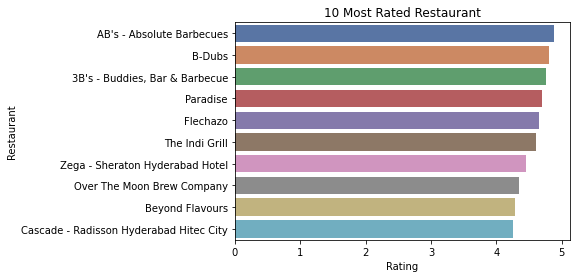

In [181]:
# Chart - 6 visualization code
#Will check best restaurants in terms of rating
top_restaurants= df2.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Rating', y='Restaurant', data=top_restaurants.sort_values(ascending=False, by='Rating')[:10],palette ='deep' )
plt.title('10 Most Rated Restaurant')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

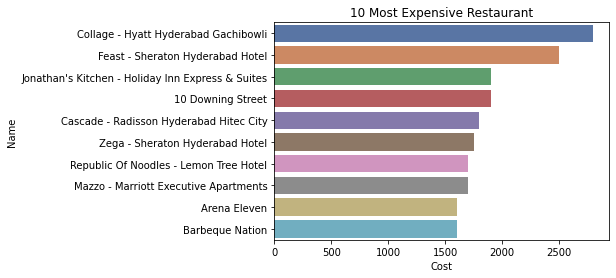

In [182]:
# Chart - 7 visualization code
# top 10 most expensive restaurant
sns.barplot(x='Cost', y='Name', data=df1.sort_values(ascending=False, by='Cost')[:10],palette ='deep')
plt.title('10 Most Expensive Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [183]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [184]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [185]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [186]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [187]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [188]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [189]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [190]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [191]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [192]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [193]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [194]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [195]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [196]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [197]:
# Expand Contraction

#### 2. Lower Casing

In [198]:
# Lower Casing

#### 3. Removing Punctuations

In [199]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [200]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [201]:
# Remove Stopwords

In [202]:
# Remove White spaces

#### 6. Rephrase Text

In [203]:
# Rephrase Text

#### 7. Tokenization

In [204]:
# Tokenization

#### 8. Text Normalization

In [205]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [206]:
# POS Taging

#### 10. Text Vectorization

In [207]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [208]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [209]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [210]:
# Transform Your data

### 6. Data Scaling

In [211]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [212]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [213]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [214]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [215]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [216]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [217]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [218]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [219]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [220]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [221]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [222]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [223]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [224]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***